In [ ]:
#Gaussian Filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('original')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('blurred')
plt.xticks([]),plt.yticks([])
plt.show()

# Mean Filtering

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("output",gray)
 
 
height, width = gray.shape
print (height, width)
 
def replaceValue(a,b,mask_size):
    filtergray = 0.0;
    for i in range(mask_size+a)[a:]:
        for j in range(mask_size+b)[b:]:
            filtergray = filtergray + gray[i,j]
    filtergray_ = filtergray/(mask_size*mask_size)
    return filtergray_
 
def meanFiltering(mask_size):
    newImage = np.zeros((height-2, width-2), np.float32)
    for i in range(height-2):
        for j in range(width-2):
            newValue = replaceValue(i,j,mask_size)
            # print newValue
            newImage[i,j] = newValue
    img = np.array(newImage, dtype=np.uint8)
    print (newImage)
    return img
 
if __name__ == '__main__':
    # replaceValue(0,0,5) #this line just for testing replaceValue method
    filterImage = meanFiltering(3)
    cv2.imshow("Mean Filtering", filterImage)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# image segmentation

In [ ]:
#pyhton Implementation

import numpy as np
import matplotlib.pyplot as plt
from skimage import data

coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0,256))
fig,(ax1)= plt.subplots()
ax1.imshow(coins, cmap=plt.cm.gray,interpolation='nearest')

In [ ]:
import cv2

#load & resize image
img = cv2.imread('mobil.jpg')
img_resize = cv2.resize(img,(640,480))

edged = cv2.Canny(img_resize,230,250)

cv2.imshow('original image', img_resize)
cv2.imshow('edge image', edged)

cv2.waitKey(0)
cv2.destroyAllWindows()

# hough line

In [ ]:
import cv2
import numpy as np

#road image
img = cv2.imread('road.jpg', cv2.IMREAD_COLOR)

#convert the image to grayscale
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#find the edges in the image using canny detector
edges = cv2.Canny(gray, 50,200)

#detect point that form a line
#cv2.HaughLinesP(<image> rho,theta,threshold,minlinelength,maxlinegap)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50,minLineLength=100, maxLineGap=20)

#draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255,0,0), 3)
    
cv2.imshow("result image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# simple Thresholding

In [ ]:
import cv2

img = cv2.imread('number_plate.JPEG')

#convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding
# cv2.thresholding(<image>, threshold value, max value, threshold method)
ret1, thresh1 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
ret3, thresh3 = cv2.threshold(img, 200, 255, cv2.THRESH_TRUNC)
ret4, thresh4 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)
ret5, thresh5 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO_INV)

#show image
cv2.imshow("Original Image",img)
cv2.imshow("Thresholded Binary", thresh1)
cv2.imshow("Thresholded Binary Inv", thresh2)
cv2.imshow("Thresholded Trunc", thresh3)
cv2.imshow("Thresholded To Zero", thresh4)
cv2.imshow("Thresholded To Zero Inv", thresh5)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Otsu's Thresholding

In [ ]:
import cv2 as cv
import numpy as np

img = cv.imread('number_plate_noise.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#global Thresholding
ret1,th1 = cv.threshold(gray,127,255,cv.THRESH_BINARY)

#OTSU's thresholding
ret2,th2 = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#otsu's Thresholding
blur = cv.GaussianBlur(gray,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#show image
cv2.imshow("original image", img)
cv2.imshow("Global Thresholding ",th1)
cv2.imshow("Otsu's Thresholding",th2)
cv2.imshow("otsu's Thresholding after Gaussian Filter",th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

# detecting and drawing contours

In [5]:
import cv2

# Baca gambar 
img = cv2.imread('rub.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# Deteksi kontur menggunakan metode CHAIN_APPROX_NONE
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Gambar kontur pada gambar asli
image_with_contours = cv2.drawContours(img, contours, -1, (0,255, 255), 3)

# Tampilkan gambar dengan kontur
cv2.imshow('countours', img)
cv2.imshow('Deteksi Kontur', image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import numpy as np
import cv2

# Load image
img = cv2.imread('rub.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to binary image, inverse white background to black and vice versa
ret, thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Apply findContours, cv2.findContours(image, mode, method)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for item in contours:
    # Draw red line on each contour using cv2.drawContours(image, contours, contourIdx, color, thickness)
    # contourIdx: Parameter indicating a contour to draw. If it is negative, all the contours are drawn
    cv2.drawContours(img, item, -1, (0, 255, 255), 3)

cv2.imshow("Contours", img)
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

# import library

In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

# read to image

In [6]:
#img = imageio.imread(lena.jpg)
img_bgr = cv2.imread("lena.jpg")
img = cv2.cvtColor (img_bgr,cv2.COLOR_BGR2RGB)
height,width,channel = img_bgr.shape

# Menampilkan Histogram Gambar RGB

# membuat Variabel Untuk menyimpan Gambar

In [3]:
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros ((768),dtype=np.int32)

NameError: name 'np' is not defined

# mengisi setiap nilai dalam array hg dengan 0

In [2]:
def makeITZero():
    for x in range(0, 256):
        hgr[x]= 0
        hgg[x]=0
        hgb [x]= 0
for x in range(0, 768):
        hgrgb[x]=0

NameError: name 'hgrgb' is not defined

In [1]:
makeITZero()

#th = int(256/64)
temp = [0]
for y in range (0, height):
    for x in range(0, width):
        red= int (img[y][x][0])
        green= int(img[y][x][1])
        blue=int(img[y][x][2])
        red = red + 0
        green = green + 256
        blue = blue +512
        #temp.append(greend)
        hgrgb[red] +=1
        hgrgb[green] +=1
        hgrgb[blue] +=1
        
binsrgb = np.linspace(0, 768,100)

binsr = np.linspace(0,0, 100)
plt.hist(hgr, binsr,color = "red", alpha=0.5)
binsg = np.linspace(0,256,100)
plt.hist(hgr, binsr,color = "green", alpha=0.5)
binsb = np.linspace(0, 768, 100)
plt.hist(hgr, binsr,color = "blue", alpha=0.5)
#plt.hist(hgr,binsrgb,alpha=0.5)
plt.plot(hgrgb)
plt.title("histogram red green blue")
plt.show()

NameError: name 'makeITZero' is not defined

# simple with opencv 

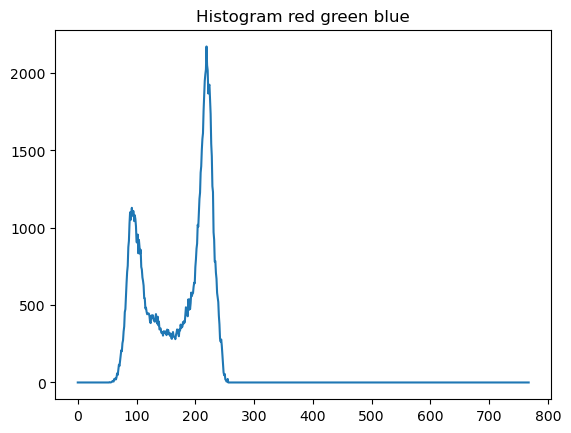

In [26]:
hist_img = cv2.calcHist([img],[0], None,[768],[0,768])
plt.plot(hist_img)
plt.title("Histogram red green blue")
plt.show()

# Menampilkan Histogram

In [ ]:
makeITZero()
for y in range (0, height):
    for x in range(0, width):
        red= int (img[y][x][0])
        green= int(img[y][x][1])
        blue=int(img[y][x][2])
        red = red + 0
        green = green + 256
        blue = blue +512
        #temp.append(greend)
        hgrgb[red] +=1
        hgrgb[green] +=1
        hgrgb[blue] +=1

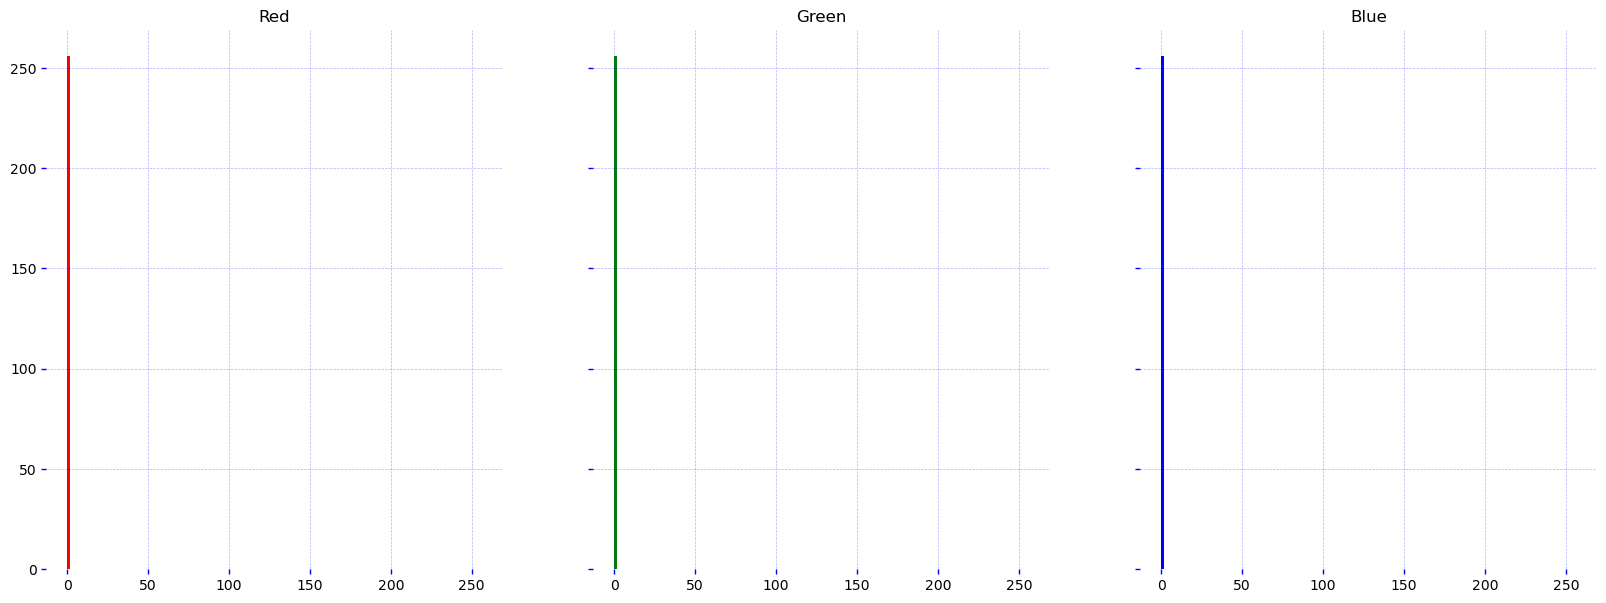

In [41]:
def plot_result(red,green,blue):
    bins = np.linspace(0,256,128)
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
    
    for ax in (ax1,ax2,ax3):
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--',linewidth =0.5,alpha=0.3)
        ax.tick_params(direction='out',color='b',width='1')
      
    ax1.set_title('Red')
    ax2.set_title('Green')
    ax3.set_title('Blue')
    
    ax1.hist(red, bins,color="Red", alpha=1)
    ax2.hist(green, bins,color="Green", alpha=1)
    ax3.hist(blue, bins,color="Blue", alpha=1)

plt.rcParams['figure.figsize'] = [20, 7]
plot_result(hgr,hgg,hgb)